# Connecting  ArcGIS PRO - R

In [5]:
###### Importing ####
library(arcgisbinding)
library(sp)
library(spdep)
#### Initialize arcgisbinding ####6
arc.check_product()



product: ArcGIS Pro ( 12.0.0.8348 )
license: Advanced

In [7]:
setwd("C:\\Dev_summit\\2017\\Data")
#### Read Features ####
inputFC <- "CA_Polygons.shp"
outputFC <- "C:\\Dev_summit\\2017\\R-Demo\\R-Demo.gdb\\output"
getwd()



[1] "C:/Dev_summit/2017/Data"

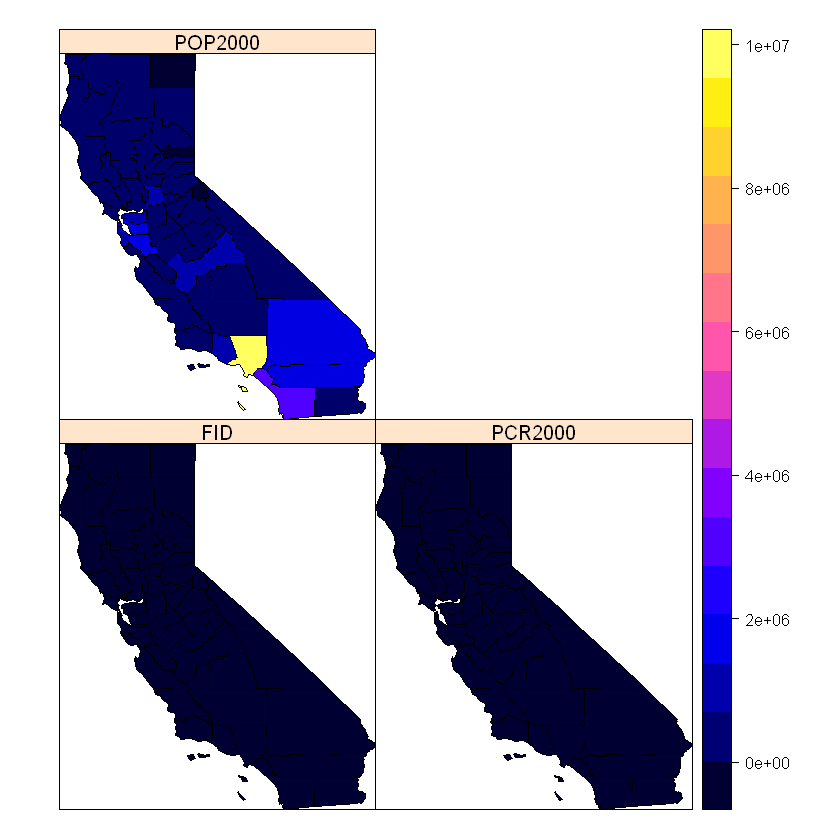

In [11]:
info <- arc.open(inputFC)

#### Create Data.Frame ####
df <- arc.select(info, c("FID", "PCR2000", "POP2000"))

#### Spatial Data Object####
spObject <- arc.data2sp(df)

#### Plot Spatial Data #### 
spplot(spObject)


In [16]:
#### Create Spatial Dependence Weight Matrix ####
gal <- poly2nb(spObject)

#### Extract the Weight ####
w <- nb2listw(gal)

#### Calculate Local Morans I ####
y <- spObject$POP2000
liw <- localmoran(y,w)
liw[0:5]

[1] 0.15698997 0.17051184 0.05699978 0.11493260 0.11016027

In [18]:
#### Add New Column/Field to Data.Frame ####
df_liw <- as.data.frame(liw)
li <- df_liw$Ii
zi <- df_liw$Z.Ii
pv <- df_liw$Pr
df$LI <- li
df$ZI <- zi
df$PValue <- pv


In [19]:
#### Create Bin Output ####
n <- length(li)
bins <- matrix("", n, 1)
slag <- lag(w, y)
mean_y <- mean(y)
for (index in 1:n){
  sig <- pv[index] < .05
  if (sig){
    globalBool <- y[index] >= mean_y
    clusterBool <- zi[index] > 0
    localBool <- slag[index] >= mean_y
    if (clusterBool){
      if (localBool){
        bins[index] = "HH"
        cat(index)
        cat(" ")
      }
      else{
        bins[index] = "LL"
      }
    }
    else{
      if (globalBool && !localBool){
        bins[index] = "HL"
      }
      else{
        bins[index] = "LH"
      }
    }
  }
}
df$COType <- bins

19 30 33 36 37 

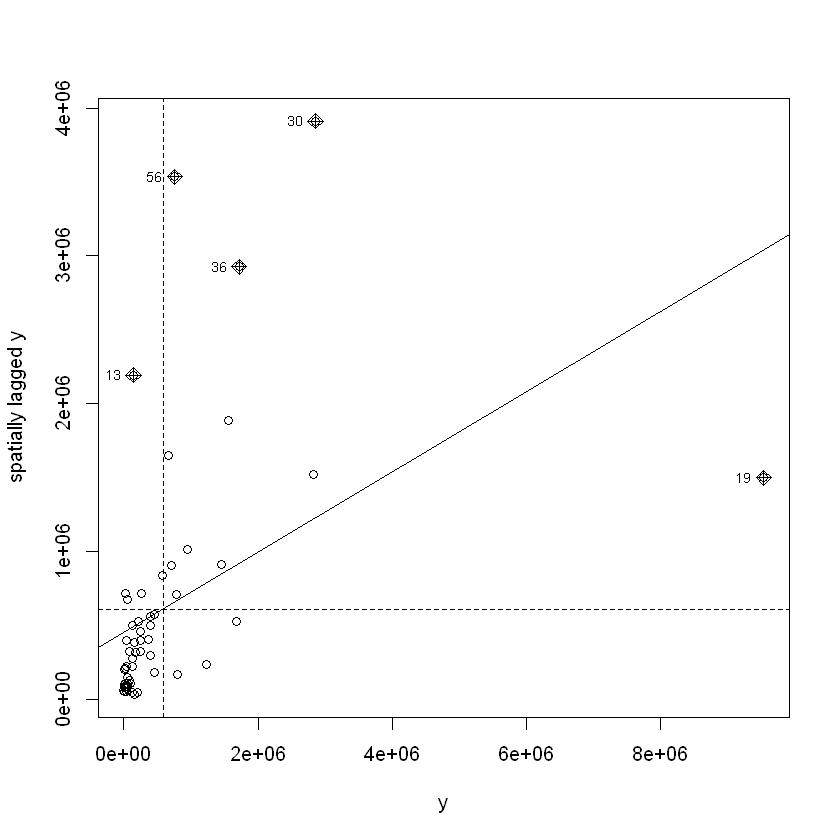

In [20]:
#### Plot Results ####
moran.plot(y, w)

In [21]:
#### Export Spatial Data to Feature Class ####
arc.write(outputFC, df)
outputFC

[1] "C:\\Dev_summit\\2017\\R-Demo\\R-Demo.gdb\\output"